### Step 1: Import python libraries

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Import Dataset using pandas

In [100]:
df = pd.read_csv(r"C:\Users\Aalok kumar\Untitled Folder\Dentistry Dataset.csv")

In [101]:
df

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [102]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [103]:
df.tail()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267
1099,1100,NaN,23,Male,24.51,24.51,6.36,6.36,6.78,6.78,0.259,0.259,0.276,0.276


In [104]:
print(f"Total number of rows : {df.shape[0]}")
print(f"Total number of columns : {df.shape[1]}")

Total number of rows : 1100
Total number of columns : 14


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [106]:
df

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


### Step 3 : Data Preprocessing

In [107]:
# Check for missing values
print(df.isnull().sum())

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [108]:
# Describe the dataset
df.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [109]:
# Create dummy variables for the Gender column
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Concatenate the original DataFrame with the dummy variables
df_numeric_only = pd.concat([df, gender_dummies], axis=1)

# Removing the unnecessary features
df_numeric_only = df_numeric_only.drop(columns=["Sample ID","Sl No"], axis=1)

In [110]:
df_numeric_only.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Female,Gender_Male
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241,True,False
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247,True,False
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264,True,False
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250,True,False
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246,True,False


In [111]:
from sklearn.model_selection import train_test_split

# Split independent & dependent variable i.e X and Y
X = df_numeric_only.drop(["Gender"],axis=1)    # independent feature should be DataFrame or 2-dimensional array
y = df_numeric_only["Gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [112]:
# Normalize the X variable
from sklearn.preprocessing import Normalizer

# dataframe
x = df_numeric_only.drop("Gender", axis=1)

# create a normalizer object
normalizer = Normalizer()

# Fit and transform the data
x_normalized = normalizer.fit_transform(x)

In [113]:
print(x_normalized)

[[0.53922772 0.56304361 0.56281893 ... 0.00541474 0.02246782 0.        ]
 [0.49563399 0.58079292 0.58101821 ... 0.00556462 0.02252882 0.        ]
 [0.53982182 0.55930235 0.55930235 ... 0.00619622 0.02347051 0.        ]
 ...
 [0.56240794 0.54531074 0.54531074 ... 0.006119   0.         0.02249632]
 [0.48766619 0.5775361  0.5775361  ... 0.00620033 0.         0.0232222 ]
 [0.52701823 0.56161812 0.56161812 ... 0.00632422 0.         0.02291384]]


In [114]:
df_numeric_only.describe()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


### Step 4 : Exploratory Data Analysis

In [115]:
# Correlation matrix

corr_matrix = df_numeric_only.corr(numeric_only=True)
corr_matrix

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Female,Gender_Male
Age,1.000000,0.071300,0.033494,0.243534,0.241017,0.162094,0.167698,0.101415,0.199058,0.112364,0.109734,-0.129936,0.129936
inter canine distance intraoral,0.071300,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299,-0.340494,0.340494
intercanine distance casts,0.033494,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846,-0.180692,0.180692
right canine width intraoral,0.243534,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783,-0.557938,0.557938
right canine width casts,0.241017,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247,-0.558057,0.558057
left canine width intraoral,0.162094,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525,-0.626347,0.626347
left canine width casts,0.167698,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036,-0.636199,0.636199
right canine index intra oral,0.101415,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836,-0.203549,0.203549
right canine index casts,0.199058,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592,-0.295163,0.295163
left canine index intraoral,0.112364,-0.343861,-0.283392,0.506583,0.506022,0.540797,0.546163,0.799557,0.922306,1.000000,0.999323,-0.379249,0.379249


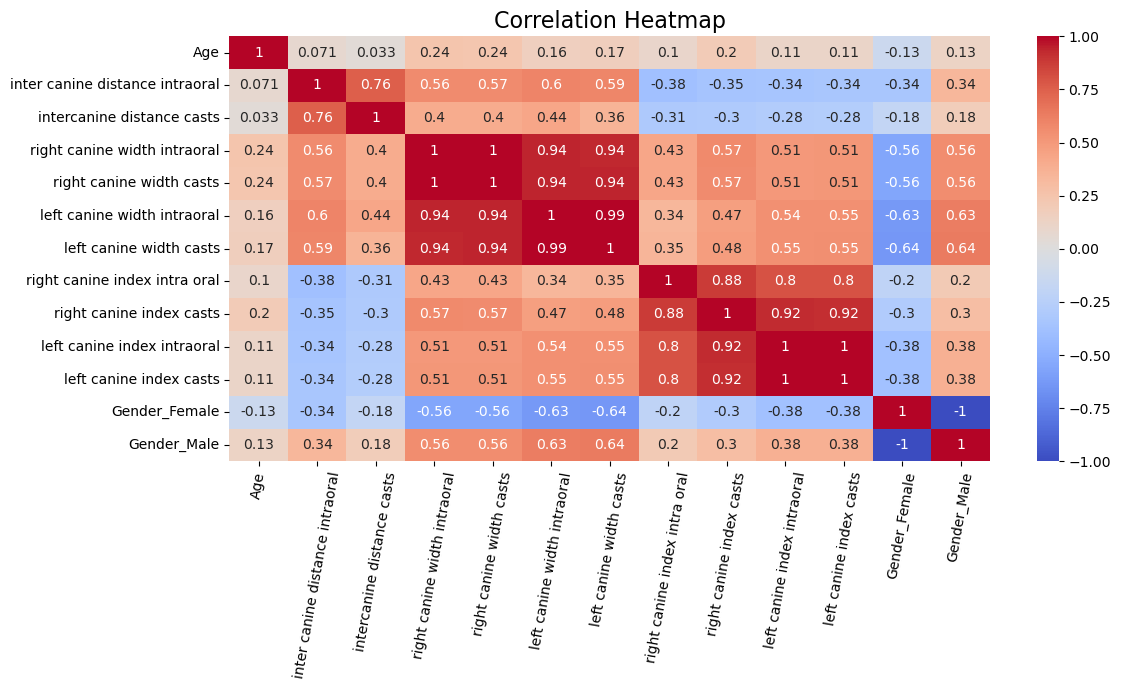

In [116]:
# To determine the figure size
plt.figure(figsize=(12,7))

# To plot a Correlation Heatmap
sns.heatmap(df_numeric_only.corr(numeric_only=True), annot=True, cmap='coolwarm' )
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

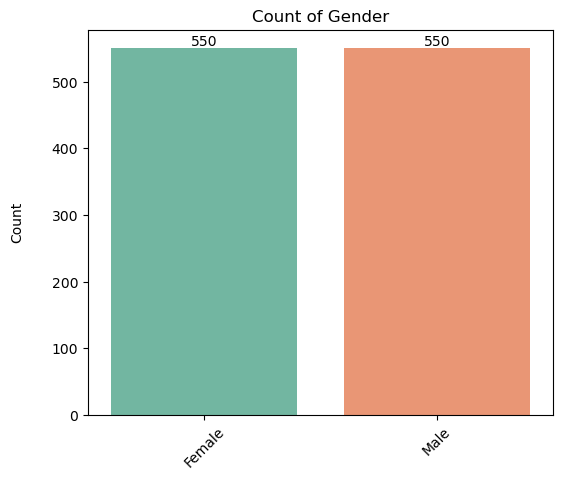

In [117]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(6,5))

# To create a countplot
sns.countplot(df_numeric_only, x="Gender", palette='Set2')
plt.title("Count of Gender")
plt.ylabel("Count", labelpad=20, fontsize=10)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')

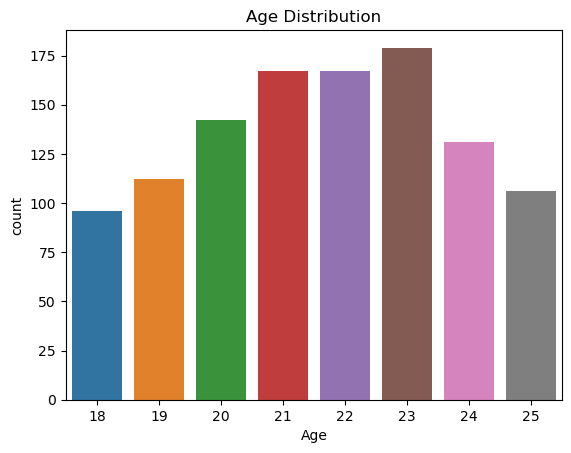

In [118]:
# Count plot for Gender
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

In [119]:
# Pie Chart representation to determine the percentage of outliers in each features

Dropdown(description='Column', options=('Age', 'inter canine distance intraoral', 'intercanine distance casts'…

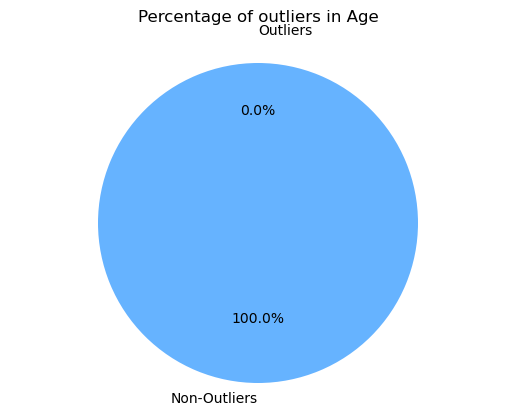

In [120]:
# import the necessary python library
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown widget for selecting a single column
column_selector = widgets.Dropdown(
    options=df_numeric_only.select_dtypes(include=["float64", "int64"]).columns.tolist(),
    description='Column',
    disabled=False
)

# Function to plot pie chart for the selected column
def plot_outliers(selected_column):
    Q1 = df_numeric_only[selected_column].quantile(0.25)
    Q3 = df_numeric_only[selected_column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df_numeric_only[selected_column] < Q1 - 1.5 * IQR) | (df_numeric_only[selected_column] > Q3 + 1.5 * IQR)

    num_outliers = outliers.sum()
    num_non_outliers = len(df_numeric_only[selected_column]) - num_outliers

    sizes = [num_outliers, num_non_outliers]
    labels = ["Outliers", "Non-Outliers"]
    colors = ["#ff9999", "#66b3ff"]
    explode = (0.1, 0)

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(column_selector)
    
    # Plot the new pie chart
    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, colors=colors,
           autopct='%1.1f%%', startangle=90)
    ax.axis("equal")
    plt.title("Percentage of outliers in {}".format(selected_column))
    plt.show()

# Function to handle the interaction
def on_column_select(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_column = change['new']
        plot_outliers(selected_column)

# Attach the handler to the dropdown widget
column_selector.observe(on_column_select)

# Display the dropdown widget
display(column_selector)

# Initial plot
plot_outliers(column_selector.value)

### Boxplot of numerical features

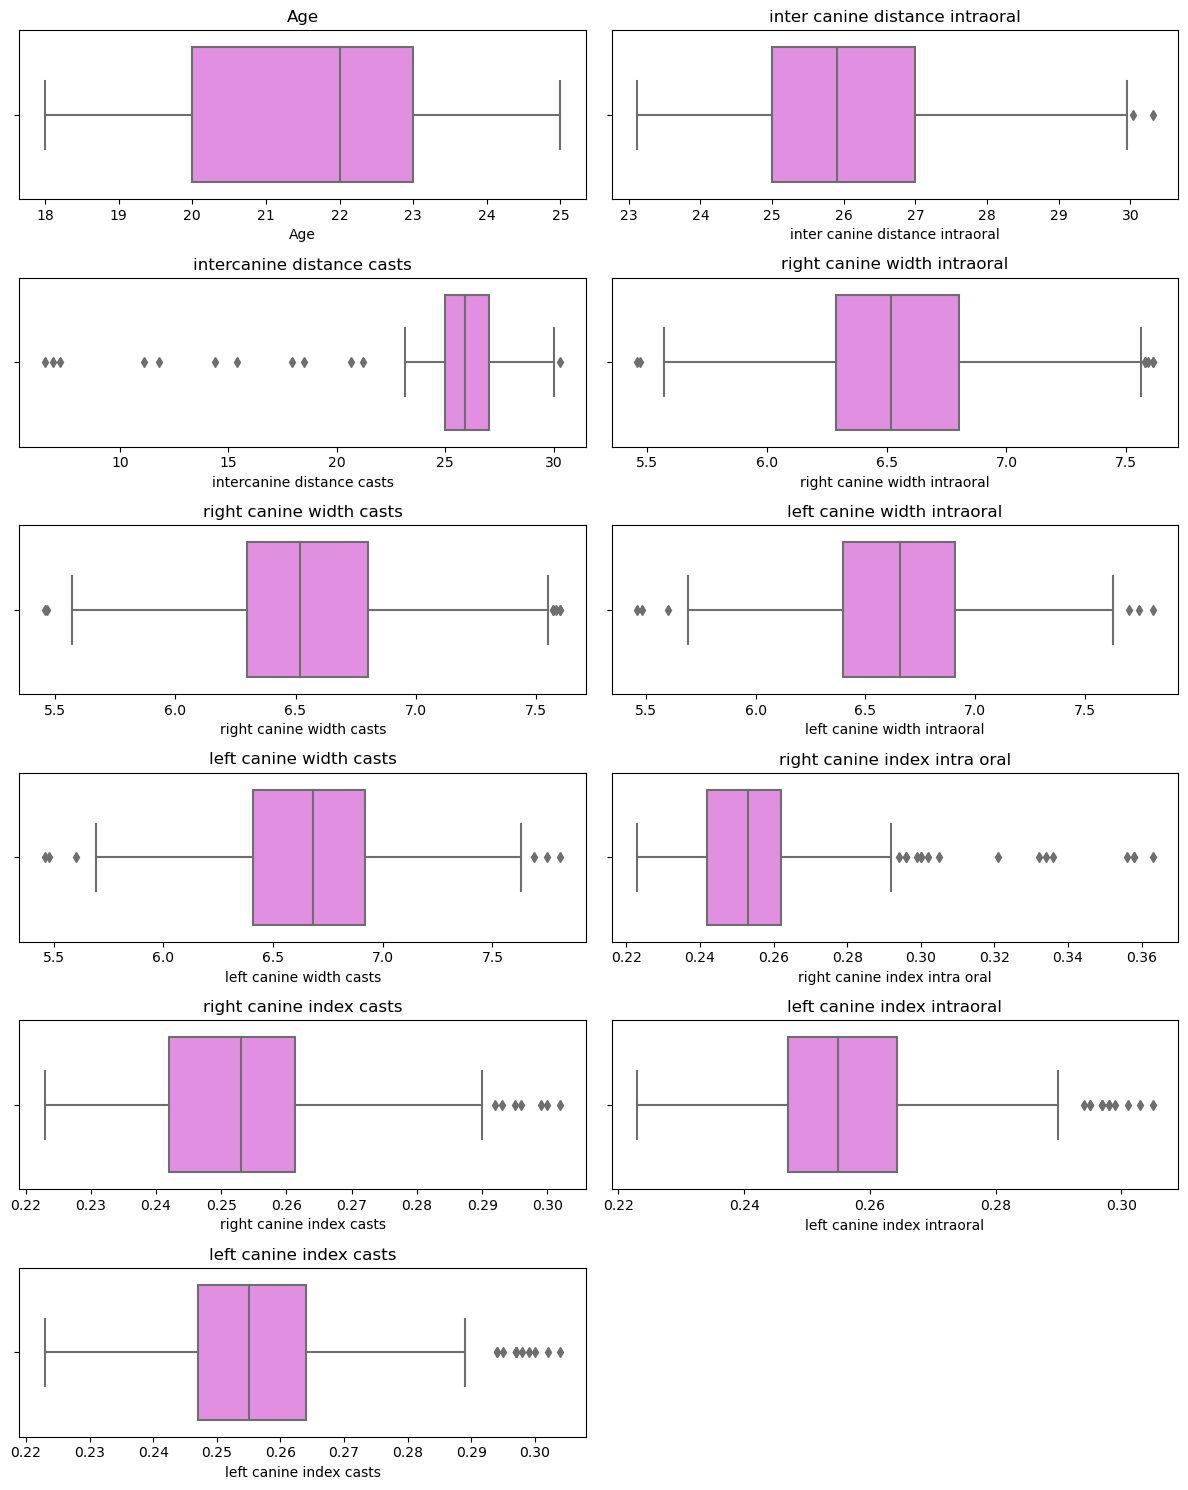

In [121]:
numerical_cols = df_numeric_only.select_dtypes(include=["float64","int64"])

# To determine the subplots and figure size
fig, axes = plt.subplots(6,2, figsize=(12,15))
axes = axes.flatten()

# To create a Boxplot for all the numerical features.
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x=numerical_cols[col], ax=axes[i], color="violet")
    axes[i].set_title(col)
    
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [122]:
## Histogram plot for numerical features

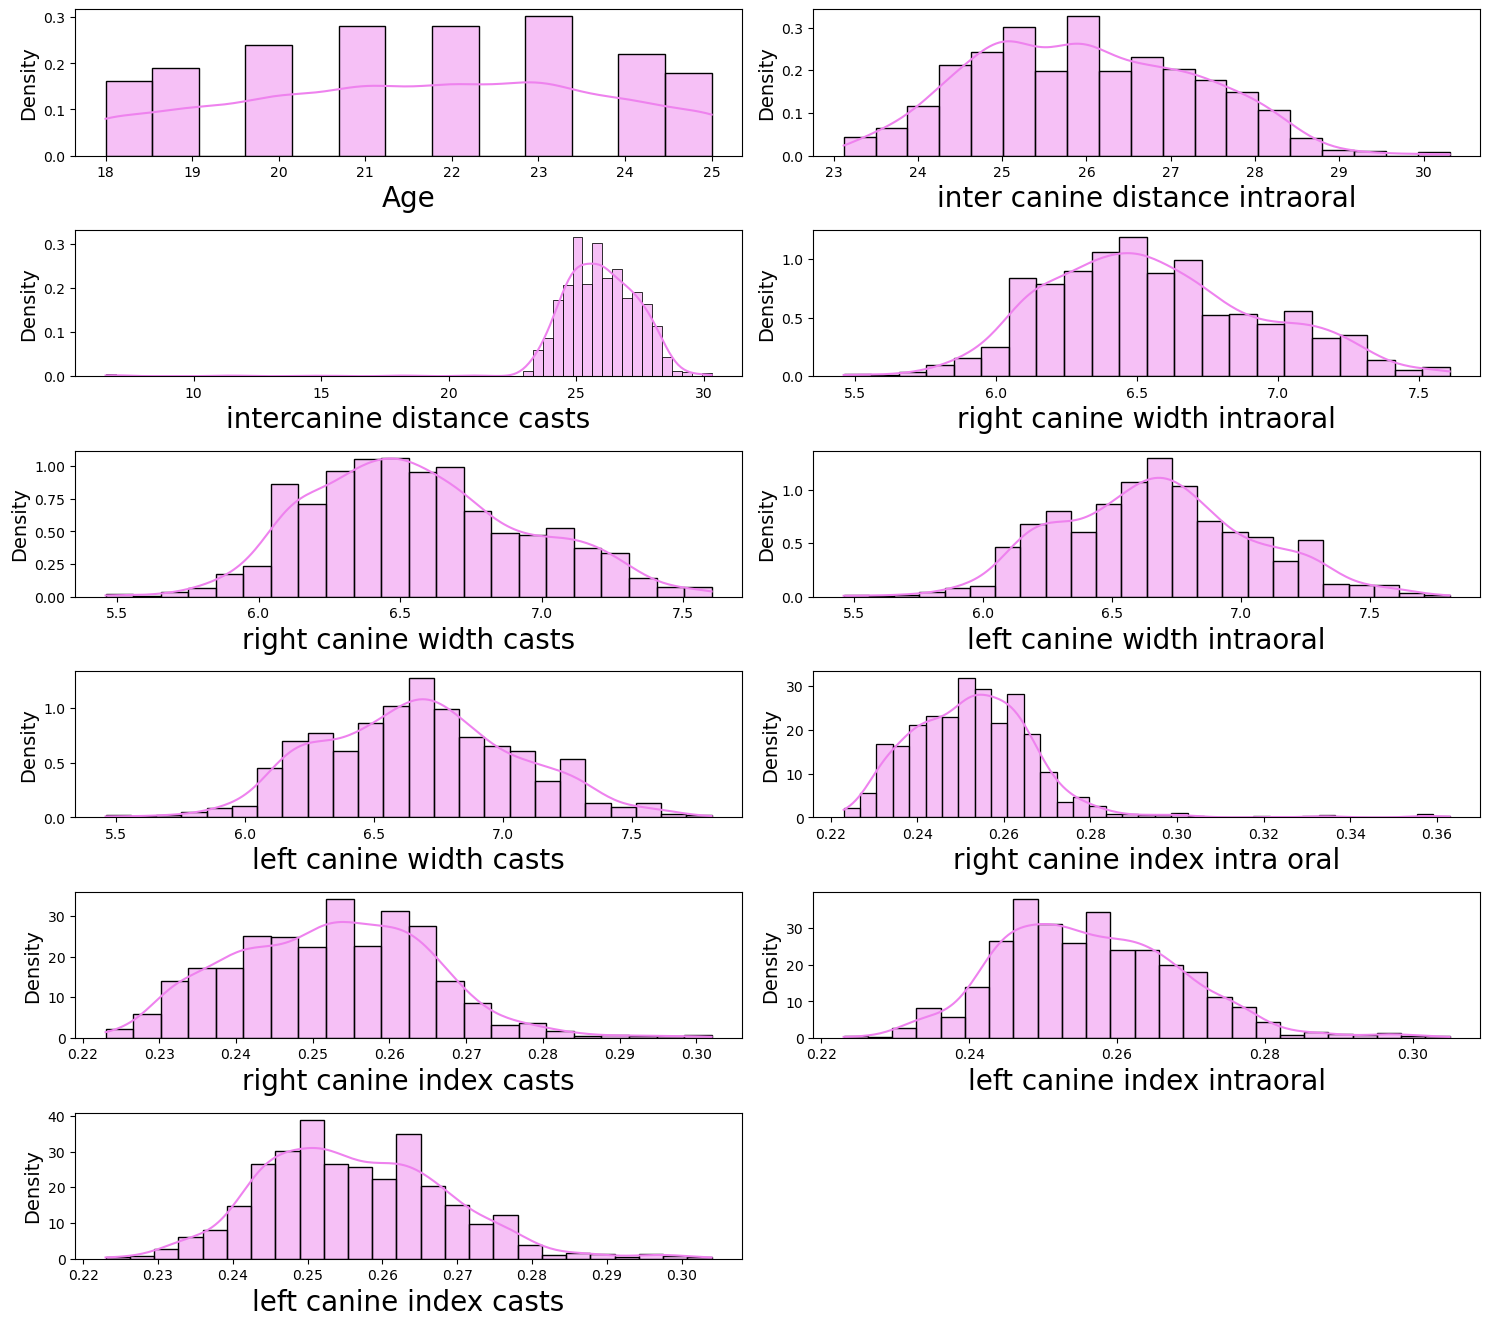

In [123]:
numerical_cols = df_numeric_only.select_dtypes(include=["float64","int64"])

# To determine the figure size
plt.figure(figsize=(15,15))

# To create a histogram plot for all the numerical features
for count,i in enumerate(numerical_cols):
    plt.subplot(7,2,count+1)
    sns.histplot(numerical_cols, x=i, kde=True, stat='density', color='violet')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()

### From this histogram plot we can see the data distribution and skewness for each features

Text(0.5, 1.0, 'Relationship between right canine width intraoral vs right canine index casts')

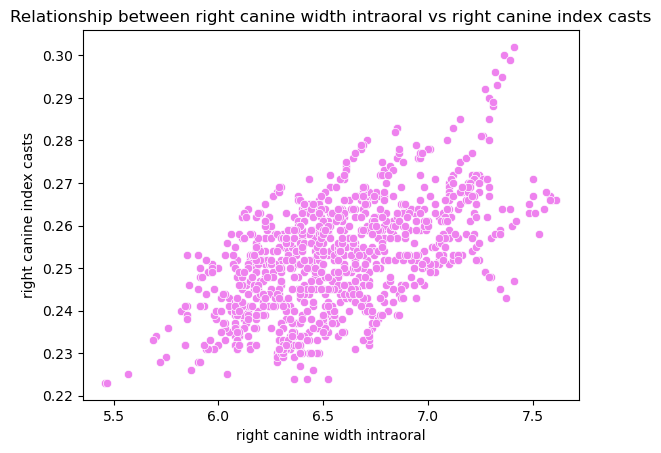

In [124]:
sns.scatterplot(df_numeric_only, x="right canine width intraoral", y="right canine index casts", color='violet')
plt.title("Relationship between right canine width intraoral vs right canine index casts")

#### The figure shows a positive correlation between the width of the right canine tooth measured intraorally and the index of the right canine tooth measured on casts. This means that as the width of the right canine tooth measured intraorally increases, the index of the right canine tooth measured on casts also tends to increase. This correlation is not perfect, but it is clear.

Text(0.5, 1.0, 'Relationship between right canine width intraoral vs left canine width intraoral')

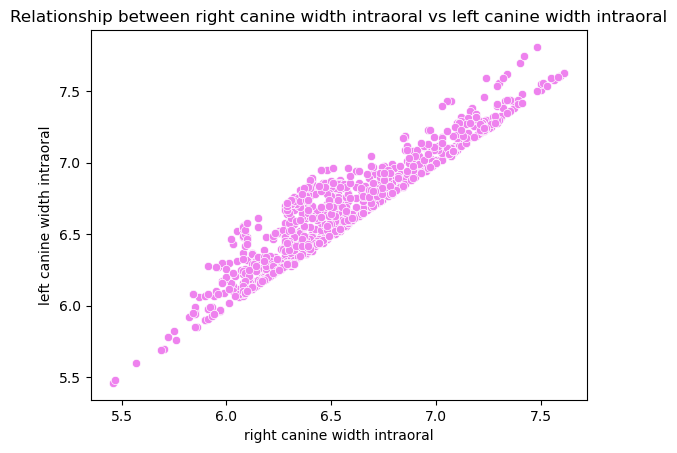

In [125]:
sns.scatterplot(df_numeric_only, x="right canine width intraoral", y="left canine width intraoral", color='violet')
plt.title("Relationship between right canine width intraoral vs left canine width intraoral")

#### This above figure shows a positive correlation between each other, if one feature increases than the other one also increases

Text(0.5, 1.0, 'Relationship between Left canine width intraoral vs Left canine width casts')

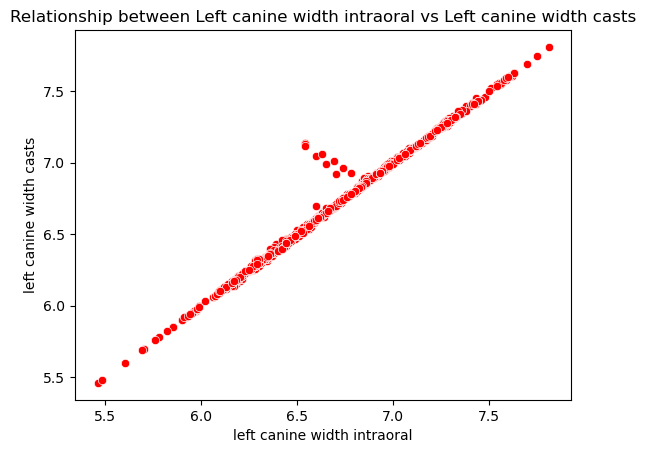

In [126]:
sns.scatterplot(df_numeric_only, x="left canine width intraoral", y="left canine width casts", color='r')
plt.title("Relationship between Left canine width intraoral vs Left canine width casts")

####  It shows a positive correlation between left canine width casts and left canine width intraoral, it is basically directly proportional to each other, as one increases other one also increases.

Text(0.5, 1.0, 'Relationship between right canine index casts vs Left canine index casts')

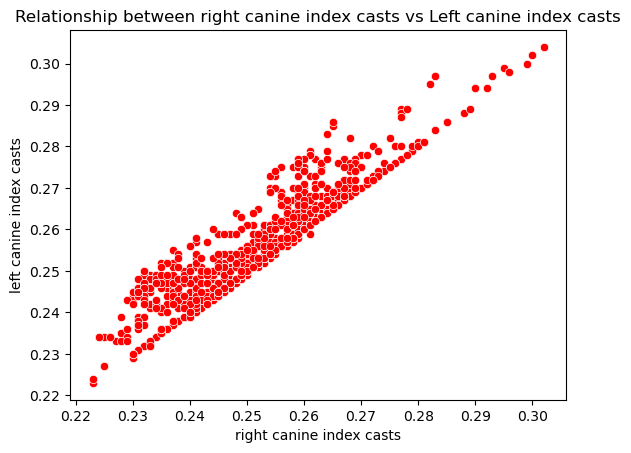

In [127]:
sns.scatterplot(df_numeric_only, x="right canine index casts", y="left canine index casts", color='r')
plt.title("Relationship between right canine index casts vs Left canine index casts")

#### The scatter plot shows a positive correlation between the right and left canine index casts. This means that as the right canine index cast increases, the left canine index cast also tends to increase. The strong positive correlation suggests that the measurements of the right and left canine index casts are highly related

# Step 5 : Model Building

In [128]:
from sklearn.model_selection import train_test_split

# Split independent & dependent variable i.e X and Y
X = df_numeric_only.drop(["Gender"],axis=1)    # independent feature should be DataFrame or 2-dimensional array
y = df_numeric_only["Gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create a logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# To check the train and test score
train_score = log_reg.score(X_train,y_train)
test_score = log_reg.score(X_test,y_test)

# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       111
        Male       1.00      1.00      1.00       109

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[111   0]
 [  0 109]]


<Axes: ylabel='Count'>

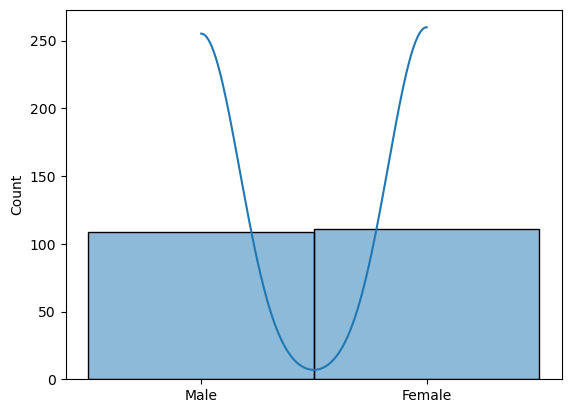

In [130]:
sns.histplot(y_pred, kde=True)

## Decision Tree classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dec_tree = DecisionTreeClassifier()

# Train the model on the training data
dec_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dec_tree.predict(X_test)

# To check the train and test score
train_score = dec_tree.score(X_train,y_train)
test_score = dec_tree.score(X_test,y_test)


# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       111
        Male       1.00      1.00      1.00       109

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[111   0]
 [  0 109]]


In [132]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

## Random Forest classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# To check the train and test score
train_score = rfc.score(X_train,y_train)
test_score = rfc.score(X_test,y_test)

# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       111
        Male       1.00      1.00      1.00       109

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[111   0]
 [  0 109]]


In [134]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)


## XGBOOST Classifier

In [135]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a DMatrix object for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

# Define the XGBoost classifier parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,  # number of classes
    'max_depth': 6,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'seed': 42
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=1000)

# Evaluate the model on the training data
train_eval = bst.eval(dtrain)
print("Train eval:", train_eval)

# Evaluate the model on the testing data
test_eval = bst.eval(dtest)
print("Test eval:", test_eval)

# Make predictions on the testing data
y_pred_prob = bst.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)

# Convert y_pred back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_labels))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_labels))

Train eval: [0]	eval-mlogloss:0.00119652943216021
Test eval: [0]	eval-mlogloss:0.00112579419034195
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       111
        Male       1.00      1.00      1.00       109

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[111   0]
 [  0 109]]


<Axes: ylabel='Count'>

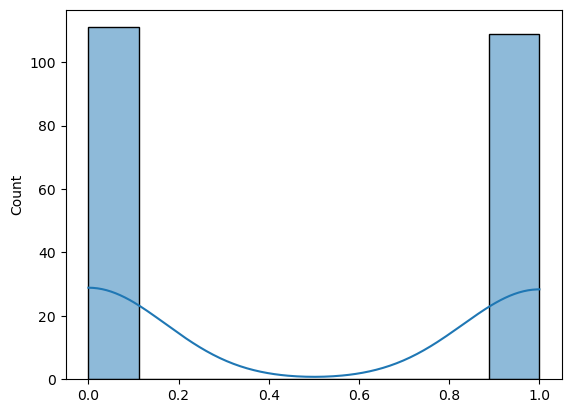

In [136]:
sns.histplot(y_pred, kde=True)


#### Conclusion :  All the models give good score with high accuracy, so our training data is best fit with all the models(logisticRegression, Decision Tree classifier, Random forest classifier, XGboost classifier)